In [1]:
from pathlib import Path

In [2]:
# Data folder paths (constants)
DATA_PATH = Path.cwd().parent.parent / "data" / "cdc" / "raw"
DATA_PATH_TEMPERATURE = DATA_PATH / "air_temperature"
DATA_PATH_SOLAR = DATA_PATH / "solar"
DATA_PATH_WIND = DATA_PATH / "wind"

# Metadata file paths (constants)
META_DATA_TEMPERATURE = DATA_PATH / "station_metadata_temperature.json"
META_DATA_SOLAR = DATA_PATH / "station_metadata_solar.json"
META_DATA_WIND = DATA_PATH / "station_metadata_wind.json"

In [3]:
# load meta data
from json import load

with META_DATA_TEMPERATURE.open("r", encoding="utf-8") as f:
    metadata_temperature = load(f)

# with META_DATA_SOLAR.open("r") as f:
#     metadata_solar = load(f)

# with META_DATA_WIND.open("r") as f:
#     metadata_wind = load(f)

In [4]:
from pprint import pprint

for station in metadata_temperature:
    station_name = station["Stationsname"]
    station_id = station["Stations_id"]
    print(f"name: {station_name}, id: {station_id}")

name: Elpersbüttel, id: 1200
name: Erfde, id: 1266
name: Grambek, id: 1736
name: Helgoland, id: 2115
name: Hohwacht, id: 2306
name: Itzehoe, id: 2429
name: Kiel-Holtenau, id: 2564
name: Leck, id: 2907
name: Leuchtturm Kiel, id: 2961
name: List auf Sylt, id: 3032
name: Lübeck-Blankensee, id: 3086
name: Pelzerhaken, id: 3897
name: Quickborn, id: 4039
name: Sankt Peter-Ording, id: 4393
name: Schleswig, id: 4466
name: Wagersrott, id: 4896
name: Wittenborn, id: 5280
name: Fehmarn, id: 5516
name: Schönhagen (Ostseebad), id: 5930
name: Ostenfeld (Rendsburg), id: 6105
name: Dörnick, id: 6163
name: Hattstedt, id: 7298
name: Padenstedt (Pony-Park), id: 7427
name: Hasenkrug-Hardebek, id: 19171
name: Wacken, id: 19172


In [5]:
# Station: Schleswig
ID_SCHLESWIG = 4466
station_schleswig = next(
    filter(
        lambda station: station["Stations_id"] == ID_SCHLESWIG,
        metadata_temperature,
    ),
)
station_schleswig

{'Stations_id': 4466,
 'von_datum': 19910417,
 'bis_datum': 20251120,
 'Stationshoehe': 43,
 'geoBreite': 54.5275,
 'geoLaenge': 9.5487,
 'Stationsname': 'Schleswig',
 'Bundesland': 'Schleswig-Holstein',
 'Abgabe': None}

In [6]:
id_station = str(ID_SCHLESWIG).zfill(5)
print(id_station)

files = list(DATA_PATH_TEMPERATURE.glob(f"*_{id_station}.txt"))
files

04466


[WindowsPath('c:/Users/Anwender/Documents/Development/simultaneousness-analysis/data/cdc/raw/air_temperature/produkt_zehn_min_tu_19910417_19991231_04466.txt'),
 WindowsPath('c:/Users/Anwender/Documents/Development/simultaneousness-analysis/data/cdc/raw/air_temperature/produkt_zehn_min_tu_20000101_20091231_04466.txt'),
 WindowsPath('c:/Users/Anwender/Documents/Development/simultaneousness-analysis/data/cdc/raw/air_temperature/produkt_zehn_min_tu_20100101_20191231_04466.txt'),
 WindowsPath('c:/Users/Anwender/Documents/Development/simultaneousness-analysis/data/cdc/raw/air_temperature/produkt_zehn_min_tu_20200101_20241231_04466.txt')]

## Datensatzbeschreibung

| Feld | Beschreibung | Einheit | Typ | Format | Fehlerwert |
|------|-----------------------------------------------|---------|--------|----------------|------------|
| MESS_DATUM  | Referenzdatum (Zeitstempel)                   | —       | NUMBER | YYYYMMDDHH24   | —          |
| QN          | Qualitätsniveau (numerischer Code)            | —       | NUMBER | 990            | -999       |
| PP_10       | Luftdruck in Stationshöhe                      | hPa     | NUMBER | 9990.0         | -999       |
| TT_10       | Lufttemperatur in 2 m Höhe                     | °C      | NUMBER | 990.0          | -999       |
| TM5_10      | Lufttemperatur in 5 cm Höhe                    | °C      | NUMBER | 990.0          | -999       |
| RF_10       | Relative Feuchte                               | %       | NUMBER | 990.0          | -999       |
| TD_10       | Taupunkttemperatur                             | °C      | NUMBER | 990.0          | -999       |

### Qualitätsniveau 

* QN = 1 : nur formale Prüfung; 
* QN = 2 : nach individuellen Kriterien geprüft; 
* QN = 3 : automatische Prüfung und Korrektur;

In [7]:
from matplotlib import pyplot as plt
import pandas as pd

kwargs = {
    "sep": ";",
    "parse_dates": ["MESS_DATUM"],
    "date_format": "%Y%m%d%H%M",
    "decimal": ".",
}
df_2010_2019 = pd.read_csv(files[2], **kwargs)
df_2020_2024 = pd.read_csv(files[3], **kwargs)

df = pd.concat([df_2010_2019, df_2020_2024], ignore_index=True)
df = df.drop(columns=["eor"])  # drop end of record column
# df = df[df["MESS_DATUM"].dt.year == 2020]
df.head()

,STATIONS_ID,MESS_DATUM,QN,PP_10,TT_10,TM5_10,RF_10,TD_10
0,4466,2010-01-01 00:00:00,3,995.8,-1.7,-2.5,76.9,-5.2
1,4466,2010-01-01 00:10:00,3,995.8,-1.8,-2.5,77.0,-5.3
2,4466,2010-01-01 00:20:00,3,995.8,-1.8,-2.5,77.2,-5.3
3,4466,2010-01-01 00:30:00,3,995.8,-1.9,-2.7,78.0,-5.2
4,4466,2010-01-01 00:40:00,3,995.8,-2.0,-2.9,78.2,-5.3


In [8]:
df.dtypes

STATIONS_ID             int64
MESS_DATUM     datetime64[ns]
  QN                    int64
PP_10                 float64
TT_10                 float64
TM5_10                float64
RF_10                 float64
TD_10                 float64
dtype: object

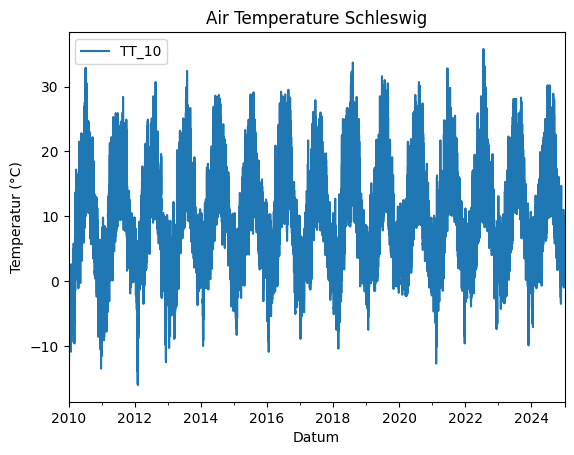

In [10]:
import numpy as np

MISSING_VALUE = -999.0
df = df.replace(MISSING_VALUE, np.nan)

df.plot(
    x="MESS_DATUM",
    y="TT_10",
    title="Air Temperature Schleswig",
    ylabel="Temperatur (°C)",
    xlabel="Datum",
)

plt.show()